# Setup Code
Before getting started we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2020FA folder and put all the files under A1 folder, then '2020FA/A1'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '2020FA/A1'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/RL/DQN1' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['test.py', 'model', 'dqn', '__pycache__', 'train.py', '.ipynb_checkpoints', 'dqn_results', 'dqn_models', 'dqn_models2', 'utils.py', 'dqn_results2', 'dqn_models3', 'dqn_results3', 'Untitled0.ipynb']


In [ ]:
cd drive/MyDrive/Colab \Notebooks/RL/DQN1

/content/drive/MyDrive/Colab Notebooks/RL/DQN1


## Train

In [ ]:
import argparse

import gym
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import time
from torch.autograd import Variable
from sklearn.model_selection import ParameterGrid
from tqdm import trange


from dqn.agent import Agent
from model.architecture import Net
from utils import *


def run(env, models_folder, episodes, steps, gamma, e, lr):
    # Initialize history memory
    step_list = []
    reward_list = []
    loss_list = []
    e_list = []

    state_space = env.observation_space.n
    action_space = env.action_space.n

    agent = Agent(e, gamma, state_space, action_space, Net(state_space, action_space))
    agent.train(True)
    # model.load_state_dict(torch.load('net_params.pkl'))
    loss = nn.MSELoss()
    optimizer = optim.Adam(agent.model.parameters(), lr=lr)

    for i in trange(episodes):
        state = int(env.reset())
        reward_all = 0
        done = False
        s = 0
        total_loss = 0

        for s in range(steps):
            state = Variable(OH(state, state_space))

            # propose an action
            action = agent.select_action(state)

            # what are the consequences of taking that action?
            new_state, reward, done, _ = env.step(action)

            # if we're dead
            if done and reward == 0.0:
                reward = -1

            # store memories for experience replay
            Q1 = agent.model(Variable(OH(new_state, state_space)))
            targetQ = agent.remember(Q1, action, reward)

            # optimize predicting rewards
            output = agent.model(state)
            train_loss = loss(output, targetQ)
            total_loss += train_loss.data

            agent.model.zero_grad()
            train_loss.backward()
            optimizer.step()

            # move to next state
            reward_all += reward
            state = new_state

            # decrease epsilon after success
            if done:
                if reward > 0:
                    agent.epsilon *= 0.9 + 1E-6  # always explore a bit during training
                break

        # logging epochs
        loss_list.append(total_loss / s)
        step_list.append(s)
        reward_list.append(reward_all)
        e_list.append(agent.epsilon)

    agent.save_model(f'{models_folder}/net_params_'+str(episodes)+'_'+str(steps)+'_'+str(gamma)+'_'+str(e)+'_'+str(lr)+'.pkl')
    return step_list, e_list, reward_list, loss_list    

100%|██████████| 5000/5000 [11:37<00:00,  7.17it/s]


{'comb': 0, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.01, 'lr': 0.1, 'wins': 70.0, 'Success Ep': 0.014, 'elapsed time (s)': 697.1002266407013}


100%|██████████| 5000/5000 [11:55<00:00,  6.99it/s]


{'comb': 1, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.01, 'lr': 0.01, 'wins': 61.0, 'Success Ep': 0.0122, 'elapsed time (s)': 715.5536925792694}


100%|██████████| 5000/5000 [11:05<00:00,  7.52it/s]


{'comb': 2, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.01, 'lr': 0.001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 665.0719616413116}


100%|██████████| 5000/5000 [02:09<00:00, 38.56it/s]


{'comb': 3, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.01, 'lr': 0.0001, 'wins': 1.0, 'Success Ep': 0.0002, 'elapsed time (s)': 129.6833198070526}


100%|██████████| 5000/5000 [11:31<00:00,  7.23it/s]


{'comb': 4, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.01, 'lr': 0.1, 'wins': 55.0, 'Success Ep': 0.011, 'elapsed time (s)': 691.656035900116}


100%|██████████| 5000/5000 [11:55<00:00,  6.99it/s]


{'comb': 5, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.01, 'lr': 0.01, 'wins': 98.0, 'Success Ep': 0.0196, 'elapsed time (s)': 715.1595163345337}


100%|██████████| 5000/5000 [11:11<00:00,  7.45it/s]


{'comb': 6, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.01, 'lr': 0.001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 671.0412585735321}


100%|██████████| 5000/5000 [08:43<00:00,  9.55it/s]


{'comb': 7, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.01, 'lr': 0.0001, 'wins': 64.0, 'Success Ep': 0.0128, 'elapsed time (s)': 523.5465593338013}


100%|██████████| 5000/5000 [11:30<00:00,  7.24it/s]


{'comb': 8, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.01, 'lr': 0.1, 'wins': 62.0, 'Success Ep': 0.0124, 'elapsed time (s)': 690.971581697464}


100%|██████████| 5000/5000 [11:02<00:00,  7.55it/s]


{'comb': 9, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.01, 'lr': 0.01, 'wins': 52.0, 'Success Ep': 0.0104, 'elapsed time (s)': 662.5918884277344}


100%|██████████| 5000/5000 [10:00<00:00,  8.32it/s]
/content/drive/My Drive/Colab Notebooks/RL/DQN1/utils.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[5, 10])


{'comb': 10, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.01, 'lr': 0.001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 600.7750260829926}


/content/drive/My Drive/Colab Notebooks/RL/DQN1/utils.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=[5, 10])
100%|██████████| 5000/5000 [03:58<00:00, 20.97it/s]


{'comb': 11, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.01, 'lr': 0.0001, 'wins': 672.0, 'Success Ep': 0.1344, 'elapsed time (s)': 238.50001215934753}


100%|██████████| 5000/5000 [04:26<00:00, 18.79it/s]


{'comb': 12, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.001, 'lr': 0.1, 'wins': 257.0, 'Success Ep': 0.0514, 'elapsed time (s)': 266.0640652179718}


100%|██████████| 5000/5000 [11:53<00:00,  7.01it/s]


{'comb': 13, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.001, 'lr': 0.01, 'wins': 24.0, 'Success Ep': 0.0048, 'elapsed time (s)': 713.5461027622223}


100%|██████████| 5000/5000 [10:50<00:00,  7.68it/s]


{'comb': 14, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.001, 'lr': 0.001, 'wins': 128.0, 'Success Ep': 0.0256, 'elapsed time (s)': 650.8776214122772}


100%|██████████| 5000/5000 [11:31<00:00,  7.23it/s]


{'comb': 15, 'episodes': 5000, 'steps': 200, 'gamma': 0.95, 'e': 0.001, 'lr': 0.0001, 'wins': 3.0, 'Success Ep': 0.0006, 'elapsed time (s)': 691.4185872077942}


100%|██████████| 5000/5000 [11:43<00:00,  7.11it/s]


{'comb': 16, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.001, 'lr': 0.1, 'wins': 39.0, 'Success Ep': 0.0078, 'elapsed time (s)': 703.7152063846588}


100%|██████████| 5000/5000 [11:37<00:00,  7.17it/s]


{'comb': 17, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.001, 'lr': 0.01, 'wins': 205.0, 'Success Ep': 0.041, 'elapsed time (s)': 697.3039658069611}


100%|██████████| 5000/5000 [11:41<00:00,  7.13it/s]


{'comb': 18, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.001, 'lr': 0.001, 'wins': 0, 'Success Ep': 0.0, 'elapsed time (s)': 701.0842926502228}


100%|██████████| 5000/5000 [03:55<00:00, 21.21it/s]


{'comb': 19, 'episodes': 5000, 'steps': 200, 'gamma': 0.97, 'e': 0.001, 'lr': 0.0001, 'wins': 53.0, 'Success Ep': 0.0106, 'elapsed time (s)': 235.79564929008484}


100%|██████████| 5000/5000 [11:41<00:00,  7.12it/s]


{'comb': 20, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.001, 'lr': 0.1, 'wins': 31.0, 'Success Ep': 0.0062, 'elapsed time (s)': 701.803459405899}


100%|██████████| 5000/5000 [11:52<00:00,  7.02it/s]


{'comb': 21, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.001, 'lr': 0.01, 'wins': 32.0, 'Success Ep': 0.0064, 'elapsed time (s)': 712.560161113739}


100%|██████████| 5000/5000 [04:56<00:00, 16.88it/s]


{'comb': 22, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.001, 'lr': 0.001, 'wins': 3573.0, 'Success Ep': 0.7146, 'elapsed time (s)': 296.2204155921936}


100%|██████████| 5000/5000 [02:41<00:00, 30.87it/s]


{'comb': 23, 'episodes': 5000, 'steps': 200, 'gamma': 0.99, 'e': 0.001, 'lr': 0.0001, 'wins': 1756.0, 'Success Ep': 0.3512, 'elapsed time (s)': 162.0036976337433}


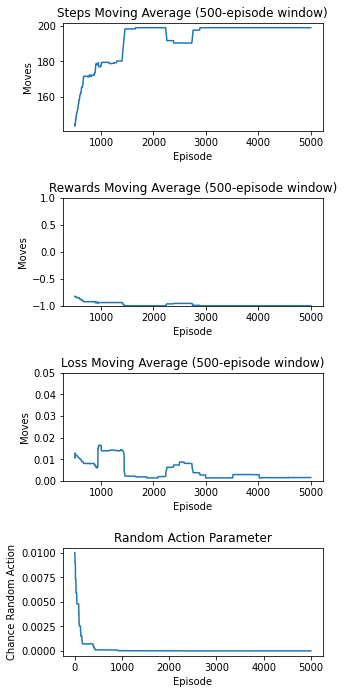

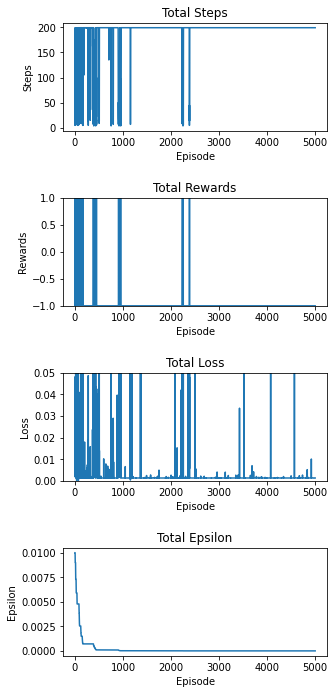

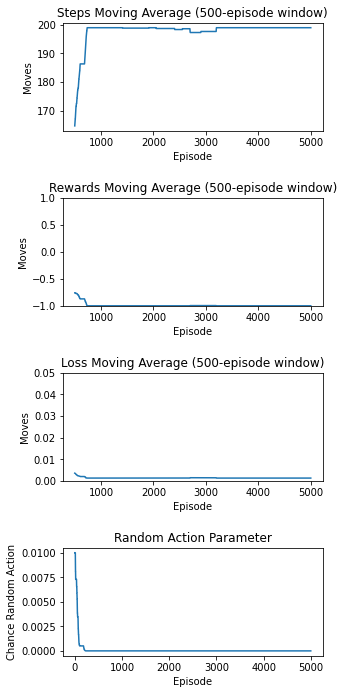

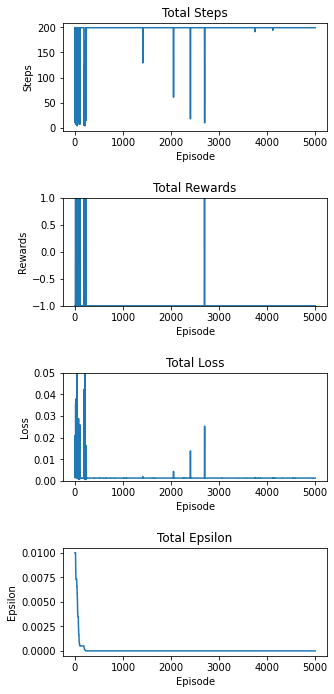

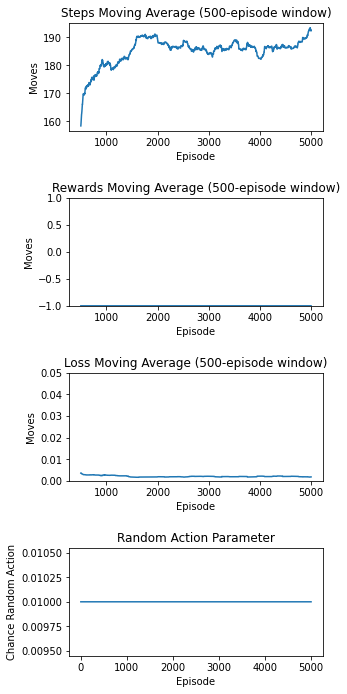

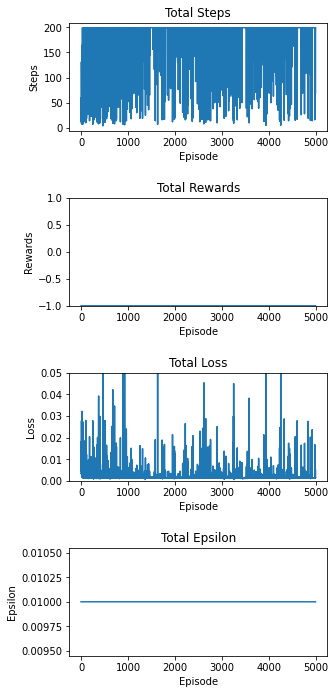

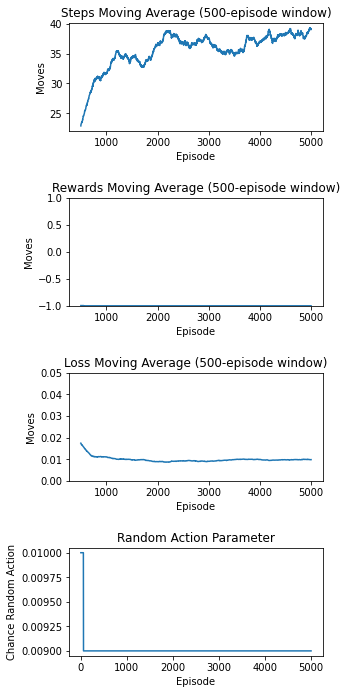

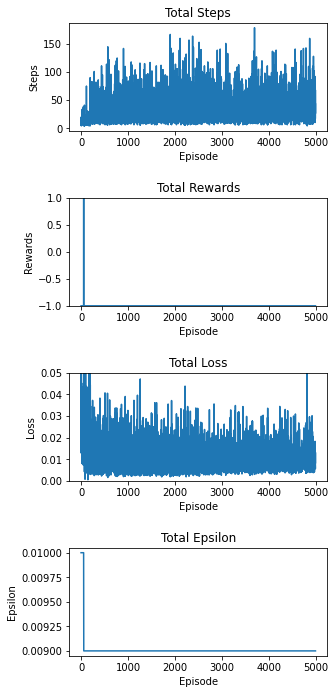

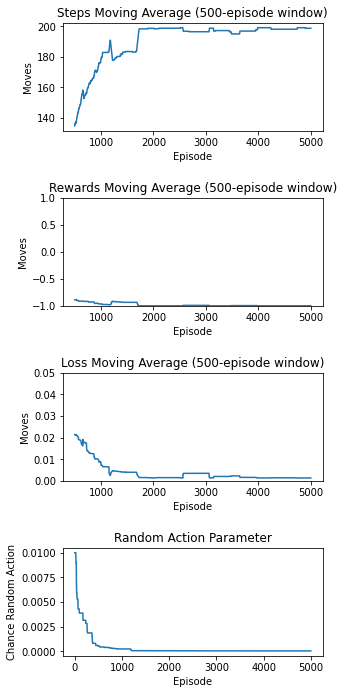

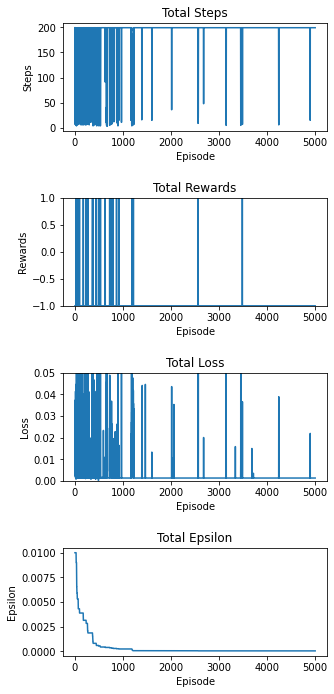

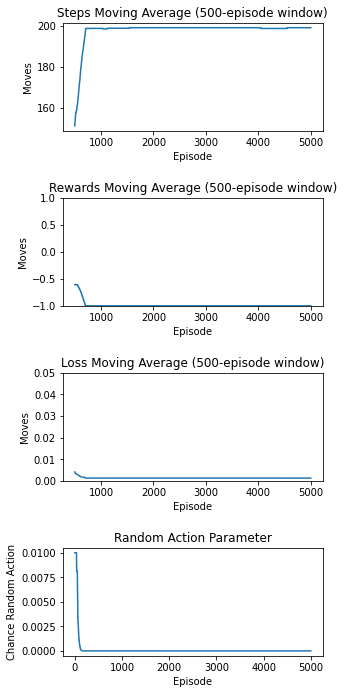

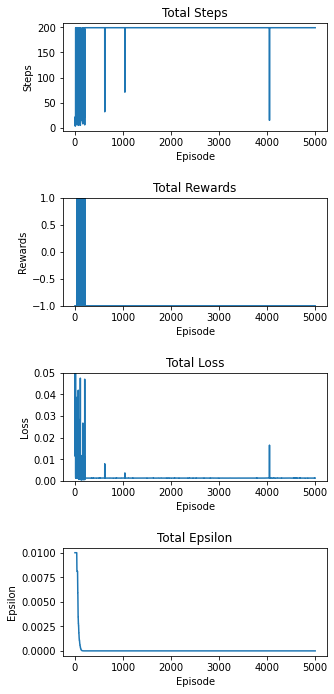

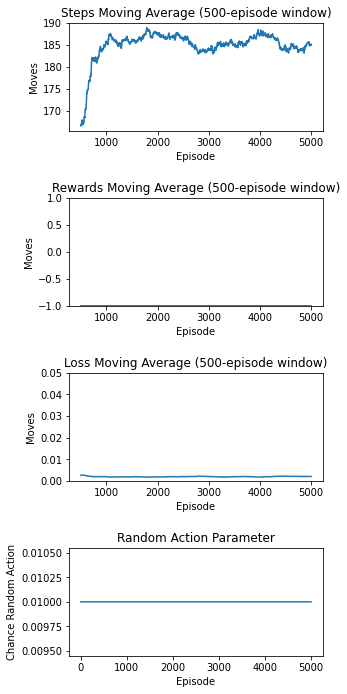

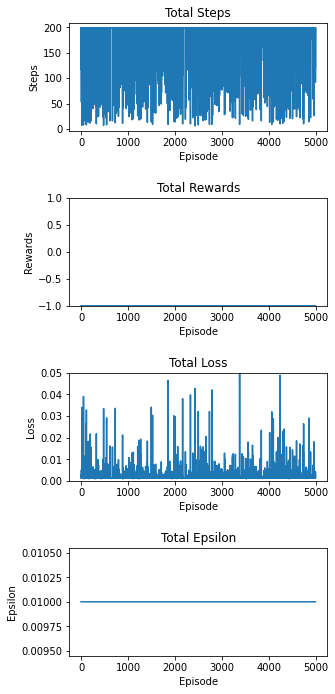

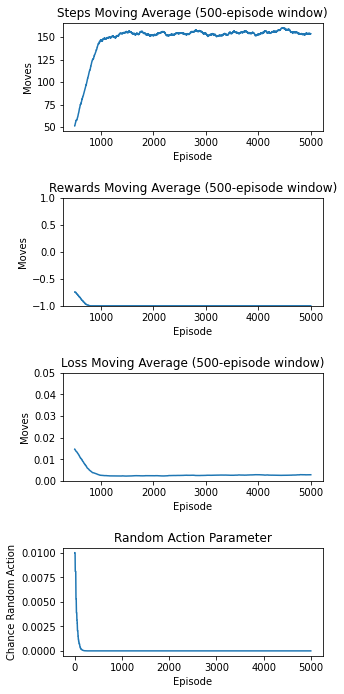

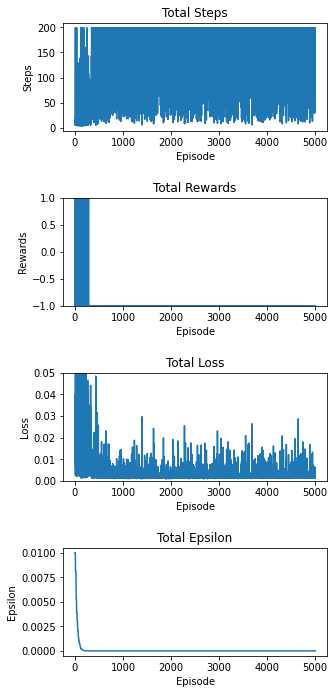

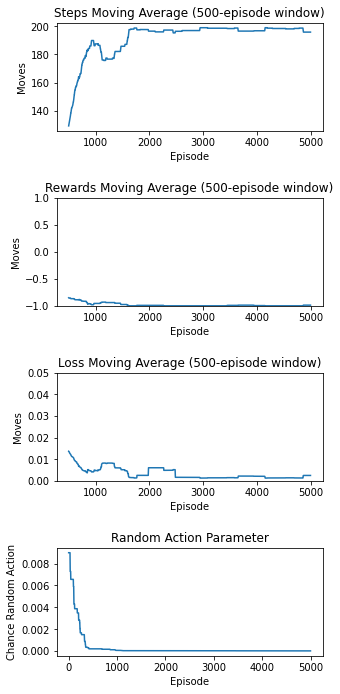

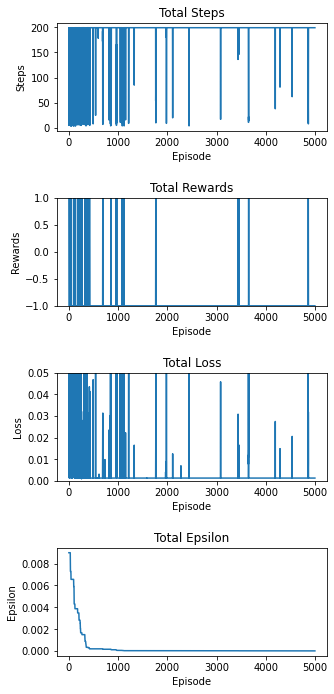

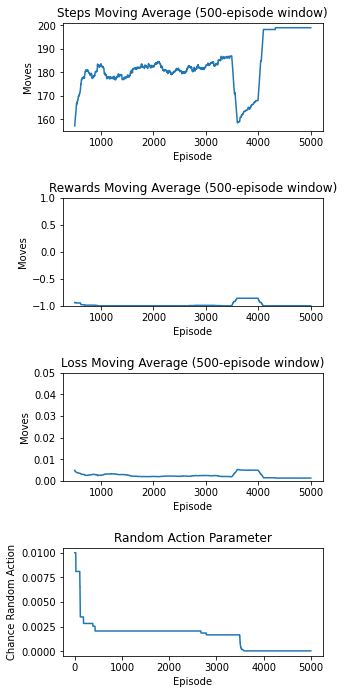

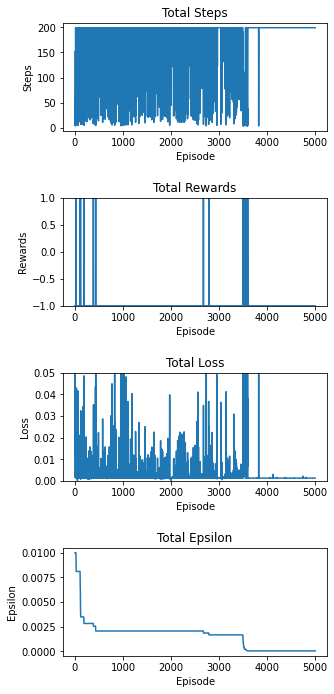

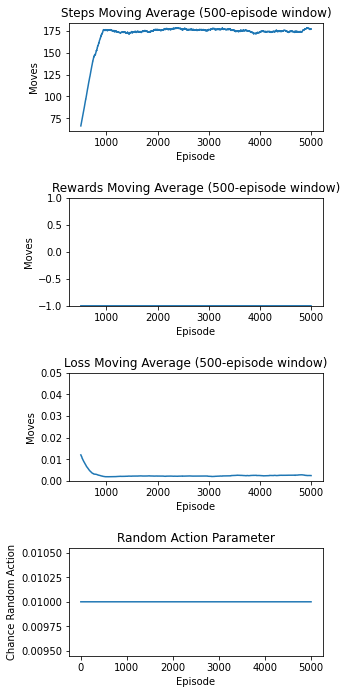

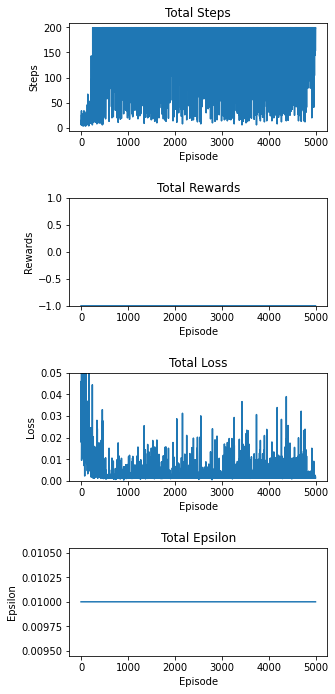

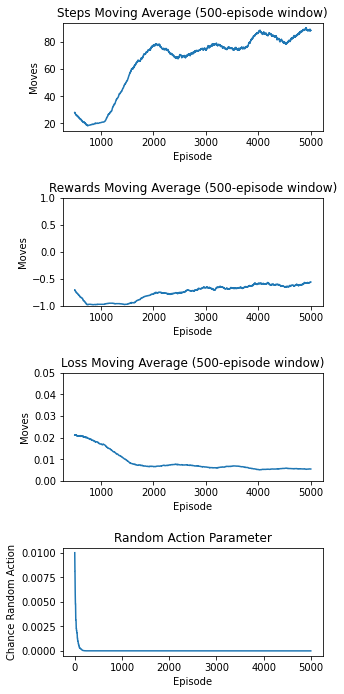

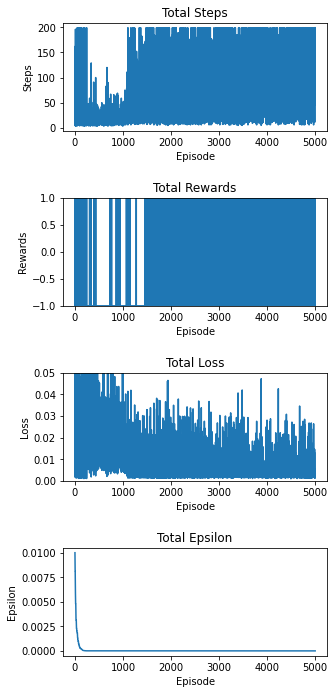

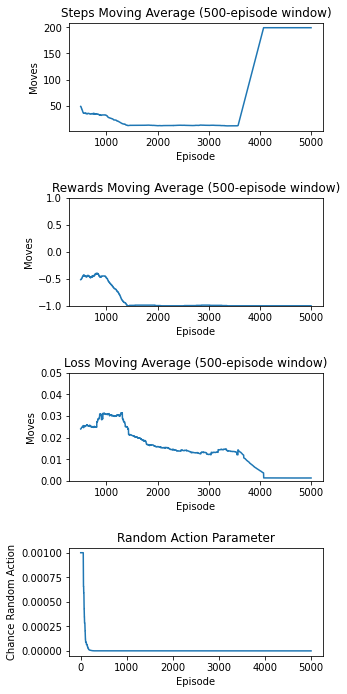

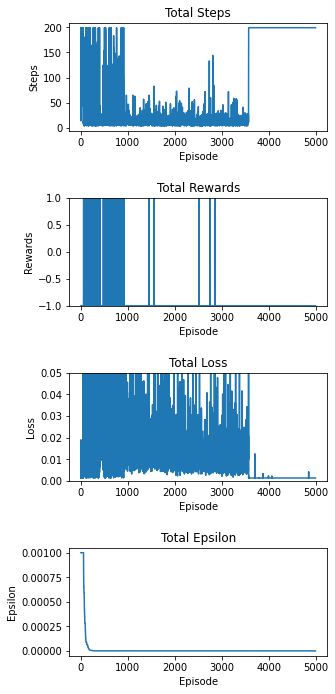

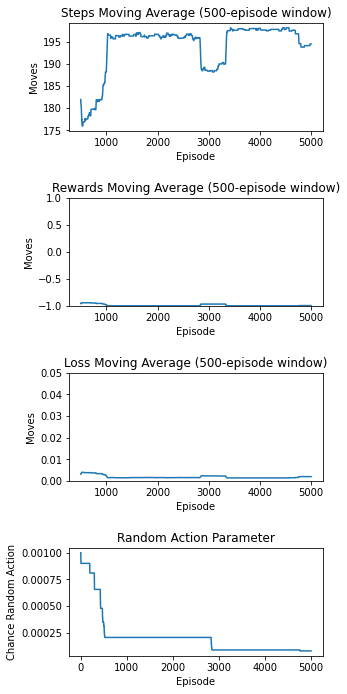

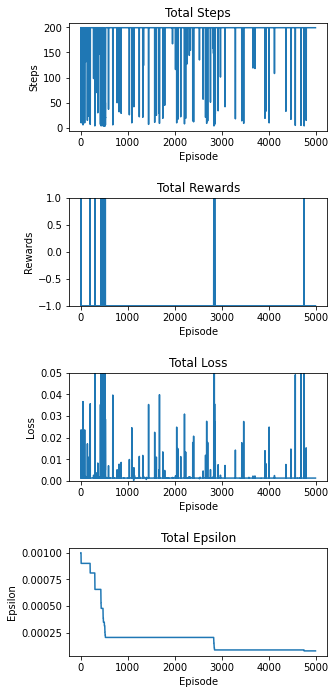

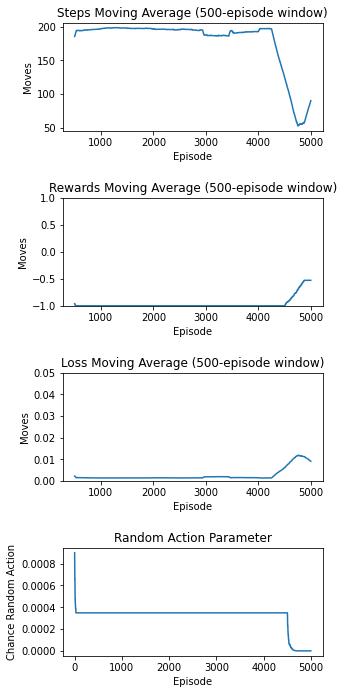

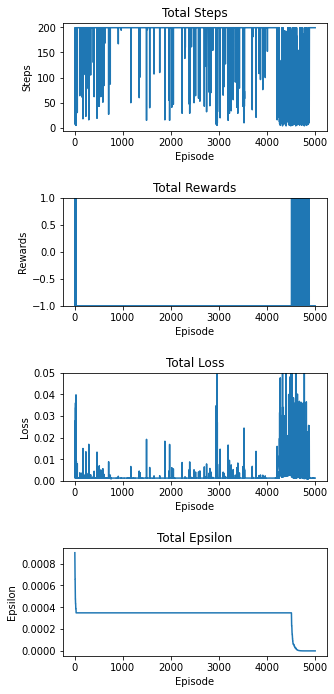

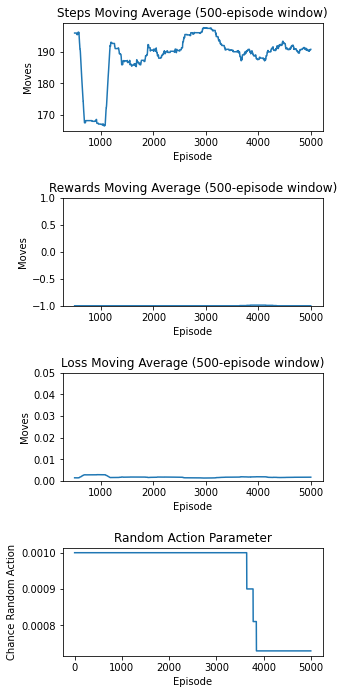

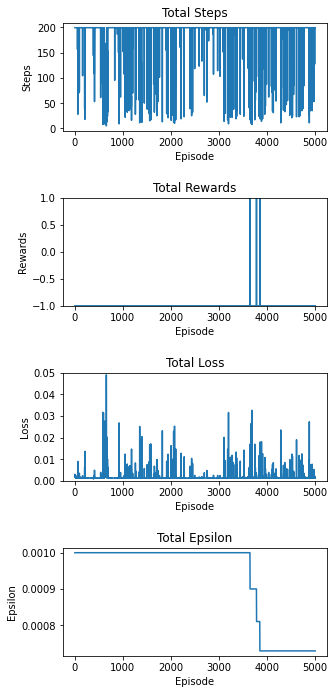

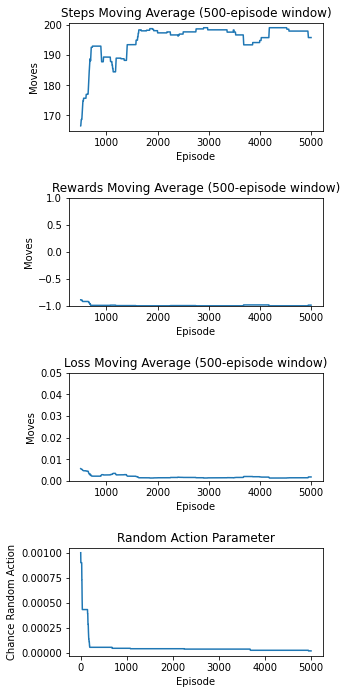

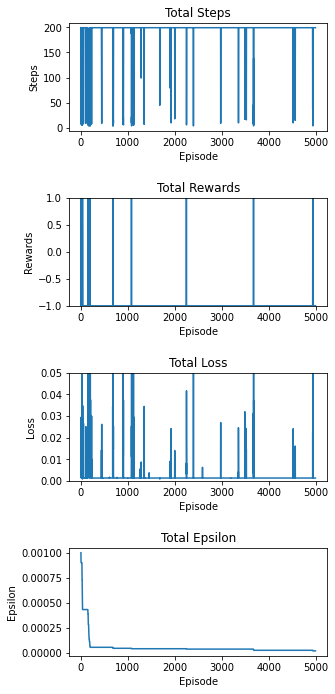

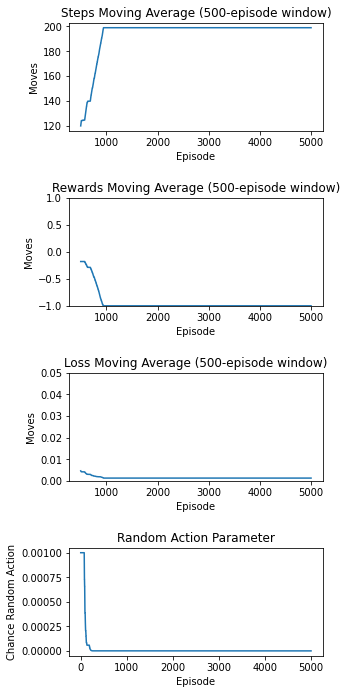

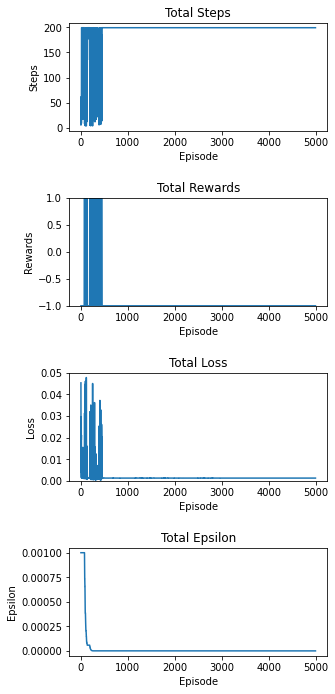

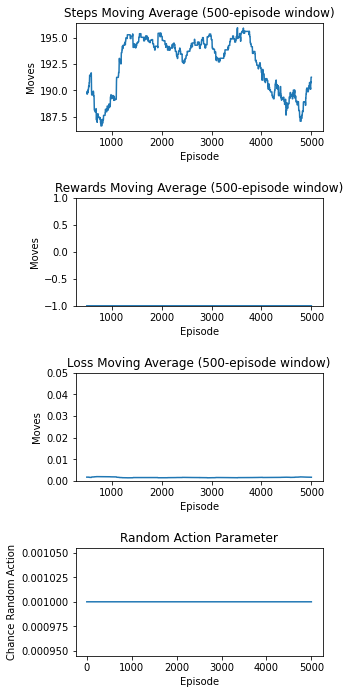

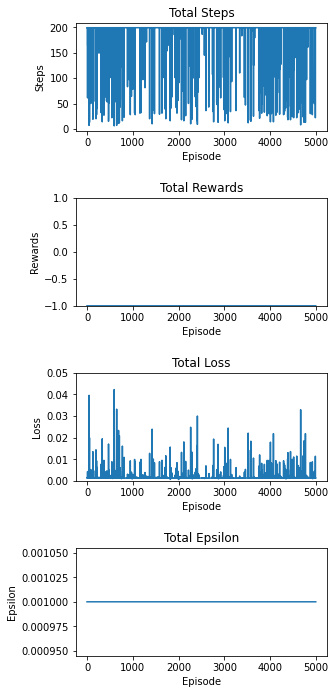

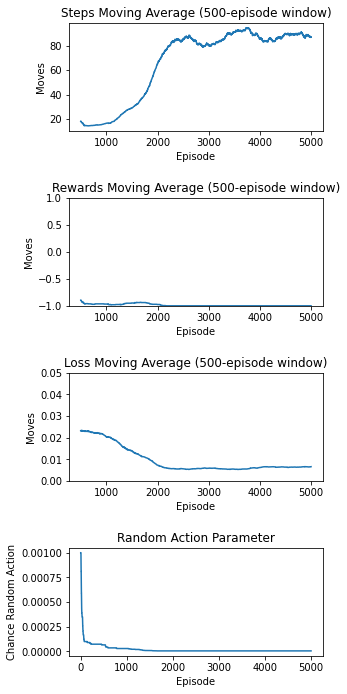

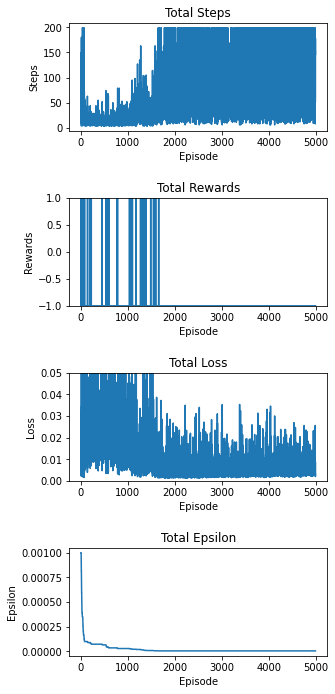

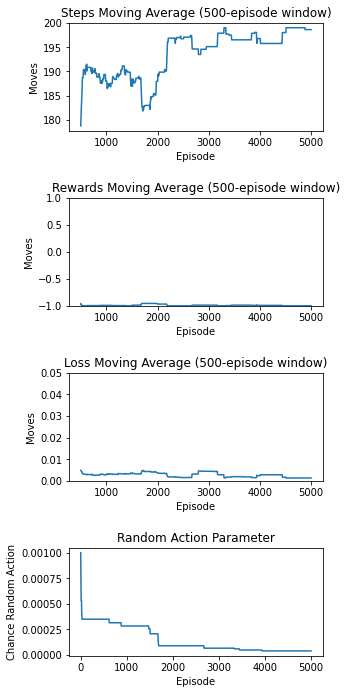

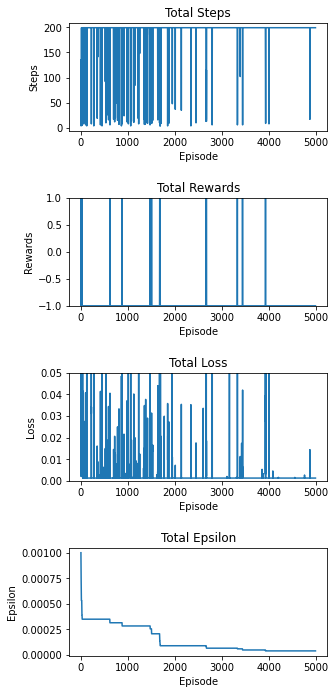

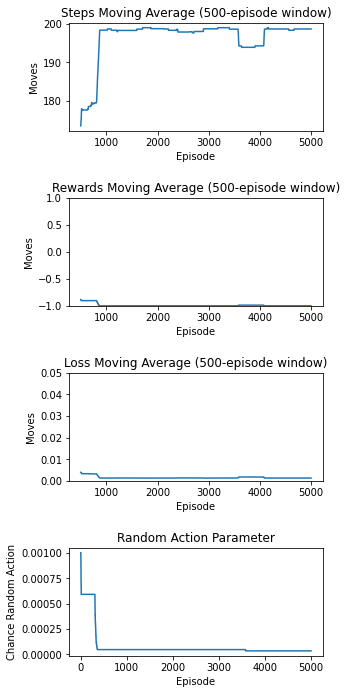

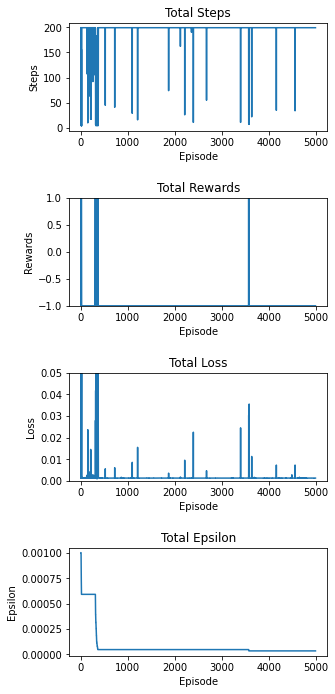

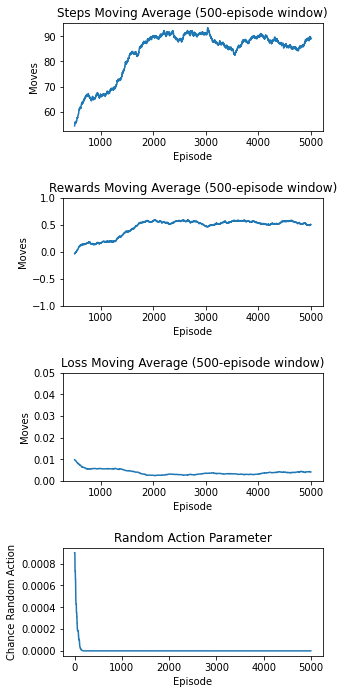

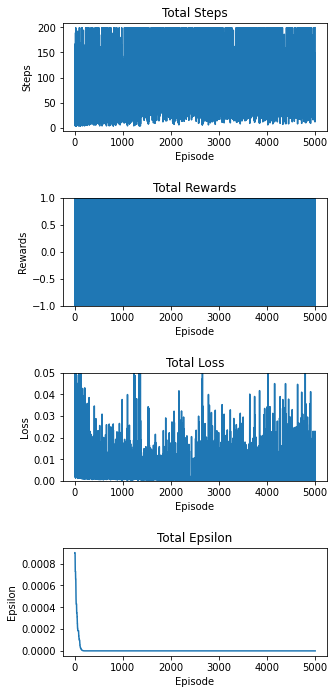

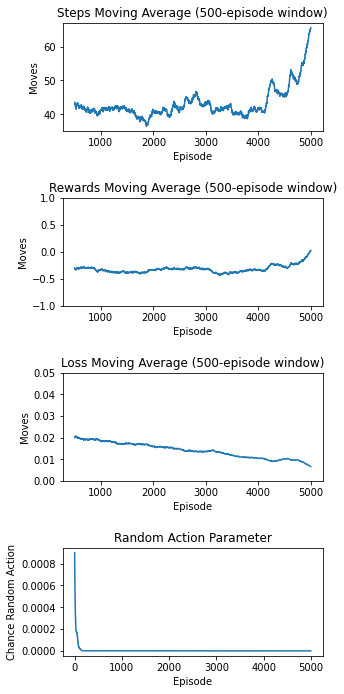

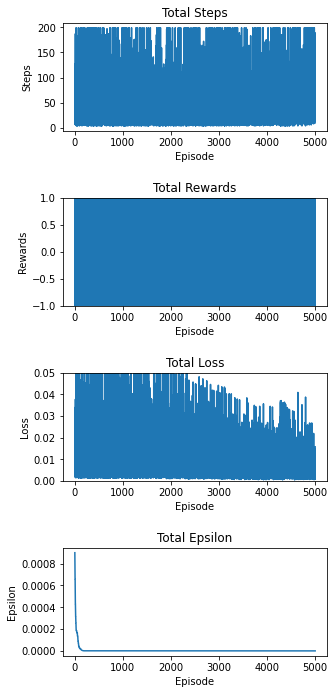

In [ ]:
if __name__ == "__main__": 

    # Environment
    env = gym.make('FrozenLake8x8-v0')

    # Reset the seed
    np.random.seed(2)
    env.seed(2)
    
    # Create directory to save models
    models_folder = 'dqn_models4'
    make_directory(models_folder)

    #param_grid = {'episodes': [3000, 5000], 'steps': [100], 'gamma': [0.85, 0.9, 0.95, 0.99], 'e':[0.001, 0.01, 0.02, 0.03], 'lr':[0.1, 0.01, 0.001, 0.0001] }
    param_grid = {'episodes': [5000], 'steps': [200], 'gamma': [0.95, 0.97, 0.99], 'e':[0.01, 0.001], 'lr':[0.1, 0.01, 0.001, 0.0001] }
    #param_grid = {'episodes': [50], 'steps': [100], 'gamma': [0.85], 'e':[0.01], 'lr':[0.01] }
    
    results = pd.DataFrame(columns=['comb', 'episodes', 'steps', 'gamma', 'e', 'lr', 'wins', 'Success Ep', 'elapsed time (s)'])

    comb = 0
    for c in ParameterGrid(param_grid):
        
        # Learning
        tic = time.time()
        step_list, e_list, reward_list, loss_list = run(env, models_folder, **c)
        toc = time.time()
        
        elapsed_time = toc - tic        
        
        wins = sum(i for i in reward_list if i > 0) 
        wins_rate = wins/ c['episodes']

        loss_avg = sum(loss_list) / c['episodes']

        new_row = {'comb': comb,
                   'episodes': c['episodes'],
                   'steps': c['steps'],
                   'gamma': c['gamma'],
                   'e': c['e'],
                   'lr': c['lr'],
                   'wins': wins,
                   'Success Ep': wins_rate,
                   'elapsed time (s)': elapsed_time} 
        
        results = results.append(new_row, ignore_index=True)

        print(new_row)

        # Create directory to save plots
        plots_folder = 'dqn_results4'
        make_directory(plots_folder)

        # Plot by window rolling
        plot_results(False, True, plots_folder, c['episodes'], comb, Steps=step_list, Rewards=reward_list, Loss=loss_list, Epsilon=e_list)

        # Plot list of values
        plot_result_lists(False, True, plots_folder, comb, Steps=step_list, Rewards=reward_list, Loss=loss_list, Epsilon=e_list)        
        
        # Number of parameters combination
        comb += 1

        # dqn_results4 https://drive.google.com/drive/folders/1-5nHnRzwQky_9v6xDriZdRPRu5OEu3tt?usp=sharing
        # dqn_models4 https://drive.google.com/drive/folders/1Tkw8AsgHxYBGi5ouX0lwguQEv2M3EkEf?usp=sharing


In [ ]:
results

,comb,episodes,steps,gamma,e,lr,wins,Success Ep,elapsed time (s)
0,0.0,5000.0,200.0,0.95,0.010,0.1000,70.0,0.0140,697.100227
1,1.0,5000.0,200.0,0.95,0.010,0.0100,61.0,0.0122,715.553693
2,2.0,5000.0,200.0,0.95,0.010,0.0010,0.0,0.0000,665.071962
3,3.0,5000.0,200.0,0.95,0.010,0.0001,1.0,0.0002,129.683320
4,4.0,5000.0,200.0,0.97,0.010,0.1000,55.0,0.0110,691.656036
5,5.0,5000.0,200.0,0.97,0.010,0.0100,98.0,0.0196,715.159516
6,6.0,5000.0,200.0,0.97,0.010,0.0010,0.0,0.0000,671.041259
7,7.0,5000.0,200.0,0.97,0.010,0.0001,64.0,0.0128,523.546559
8,8.0,5000.0,200.0,0.99,0.010,0.1000,62.0,0.0124,690.971582
9,9.0,5000.0,200.0,0.99,0.010,0.0100,52.0,0.0104,662.591888


In [ ]:
    # step_list: step where 'Done' was threw, per episode
    # reward_list: total rewards per episode
    # loss_list: average loss per episode: total loss divided by final step number, per episode 
    # e_list: average loss per episode: total loss divided by final step number, per episode 

results.to_csv("Results_table.csv", sep='\t', encoding='utf-8', index=False)

In [ ]:
#!zip -r dqn_results.zip content/dqn_results

#from google.colab import files
#files.download("/content/linear_ql_rewards_tabest.zip")